In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data_path = 'data.csv'
data = pd.read_csv(data_path)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33699 entries, 0 to 33698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pt_ID            33699 non-null  int64  
 1   gender           33694 non-null  float64
 2   diagnosis        33264 non-null  float64
 3   hosp_admin       32573 non-null  float64
 4   age_band_jan1    33265 non-null  object 
 5   bmi              20403 non-null  float64
 6   smoker           22210 non-null  object 
 7   past_smoker      19072 non-null  object 
 8   diet_preference  22159 non-null  object 
 9   cancer           1481 non-null   object 
 10  heart_disease    1378 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 2.8+ MB
None


,pt_ID,gender,diagnosis,hosp_admin,age_band_jan1,bmi,smoker,past_smoker,diet_preference,cancer,heart_disease
0,0,2.0,2.0,2.0,55-59,25.2,No,Yes,No_pref,NaN,NaN
1,1,1.0,1.0,2.0,50-54,31.2,No,Yes,No_pref,NaN,NaN
2,2,1.0,2.0,1.0,30-34,28.4,No,Yes,No_pref,NaN,NaN
3,3,2.0,1.0,2.0,50-54,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2.0,2.0,2.0,50-54,28.6,No,No,No_pref,NaN,NaN


In [74]:
def bmi_to_cat(bmi):
    cat = ''
    if bmi <= 18.5:
        cat = 'underweight'
    elif bmi <= 24.9:
        cat = 'healthy weight'
    elif bmi <= 29.9:
        cat = 'overweight'
    elif bmi <= 39.9:
        cat = 'obese'
    else:
        cat = 'severely obese'
    return cat
data['bmi_categories'] = data['bmi'].apply(bmi_to_cat)

/home/ahmed/miniconda3/envs/base_development/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_band_jan1', ylabel='count'>

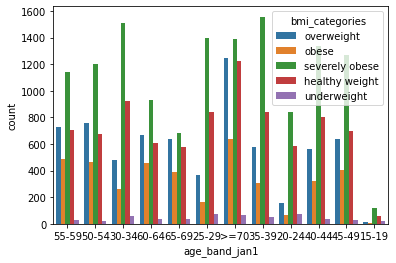

In [75]:
sns.countplot(data.age_band_jan1, hue=data.bmi_categories)

In [76]:
plot_data = data[['pt_ID', 'age_band_jan1', 'bmi_categories']]\
.groupby(['age_band_jan1', 'bmi_categories']).count().reset_index()

plot_data.columns = [*plot_data.columns[:-1], 'count']
plot_data.head()

,age_band_jan1,bmi_categories,count
0,15-19,healthy weight,59
1,15-19,obese,4
2,15-19,overweight,14
3,15-19,severely obese,119
4,15-19,underweight,18


In [77]:
plot_data = pd.pivot_table(plot_data, values='count', index='age_band_jan1', columns='bmi_categories')\
.reset_index()

plot_data

bmi_categories,age_band_jan1,healthy weight,obese,overweight,severely obese,underweight
0,15-19,59,4,14,119,18
1,20-24,586,66,159,844,78
2,25-29,839,168,367,1400,74
3,30-34,920,259,480,1509,57
4,35-39,840,308,579,1556,49
5,40-44,802,320,566,1338,35
6,45-49,695,407,638,1272,30
7,50-54,677,465,760,1200,25
8,55-59,703,491,731,1139,30
9,60-64,610,460,670,928,35


In [78]:
plot_data.iloc[:, 1:] = plot_data.iloc[:, 1:].div(plot_data.sum(axis=1), axis=0)
plot_data = \
plot_data[['age_band_jan1', 'underweight', 'healthy weight', 'overweight', 'obese', 'severely obese']]
plot_data

/tmp/ipykernel_14781/922130125.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plot_data.iloc[:, 1:] = plot_data.iloc[:, 1:].div(plot_data.sum(axis=1), axis=0)


bmi_categories,age_band_jan1,severely obese,obese,overweight,healthy weight,underweight
0,15-19,0.556075,0.018692,0.065421,0.275701,0.084112
1,20-24,0.487017,0.038084,0.091748,0.338142,0.045009
2,25-29,0.491573,0.058989,0.128862,0.294593,0.025983
3,30-34,0.467907,0.080310,0.148837,0.285271,0.017674
4,35-39,0.466987,0.092437,0.173770,0.252101,0.014706
5,40-44,0.437112,0.104541,0.184907,0.262006,0.011434
6,45-49,0.418146,0.133794,0.209730,0.228468,0.009862
7,50-54,0.383754,0.148705,0.243044,0.216501,0.007995
8,55-59,0.368132,0.158694,0.236264,0.227214,0.009696
9,60-64,0.343322,0.170181,0.247873,0.225675,0.012949


Text(0.5, 1.0, 'BMI categories')

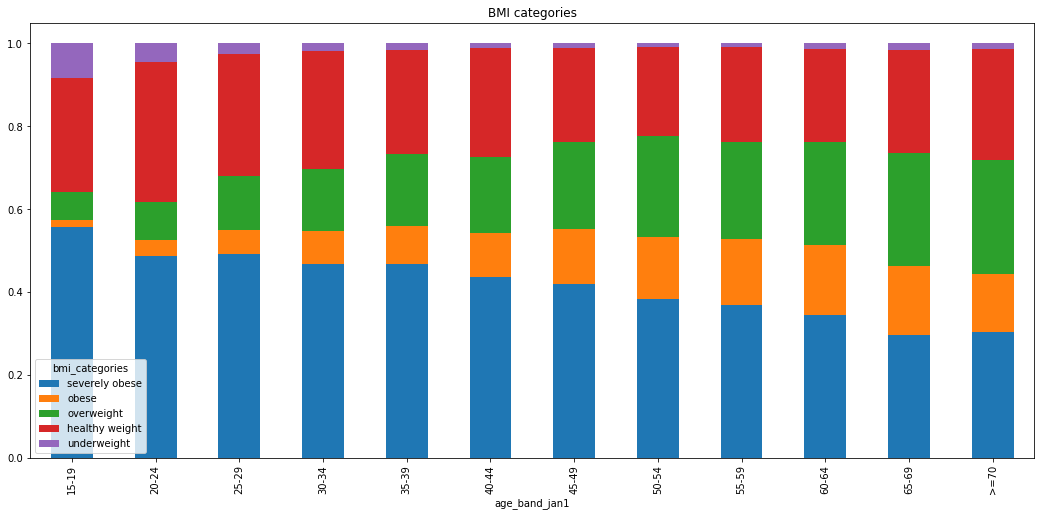

In [86]:
plot_data.plot(
x='age_band_jan1',
kind = 'bar',
stacked = True,
figsize=(18,8))

plt.title('BMI categories')